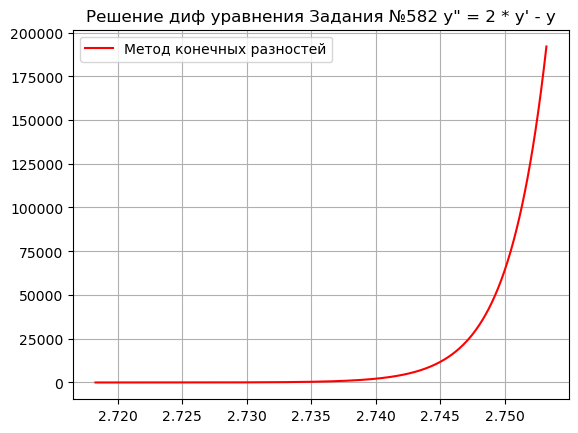

In [1]:
# Задание №582 y" = 2 * y' - y
import matplotlib.pyplot as plt
import math as m


def solve(x0, c3=1, c4=1):
    return (7 - 3 * x0) * m.exp(x0 - 2)


h = 0.000035
x = [m.e]
y_dif, y_an = x[:], x[:]
for i in range(1, 1000):
    x.append(x[i - 1] + h)
    y_dif.append((2 * y_dif[i-1] - y_dif[i-2] + 2 * h * y_dif[i-1] + y_dif[i-1] * m.pow(h, 2)) / (1 - 2 * h))
    y_an.append(solve(x[i]))

# plt.plot(x, y_an, color='orange', label='Аналитическое решение')
plt.plot(x, y_dif, color='red', label='Метод конечных разностей')
plt.legend(loc='upper left')
plt.title("Решение диф уравнения Задания №582 y\" = 2 * y\' - y")
plt.grid()
plt.show()

In [2]:
# Pandas, Numpy, Matplotlib, Seaborn, Scikit-learn, SciPy, Keras, Pytorch, Tensorflow, Theano
import os
os.environ['TF_CCP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf


x = tf.Variable([[2.0]])
y = tf.Variable([[-4.0]])
with tf.GradientTape() as tape:
    f = (x + y) ** 2 + 2 * x * y

df = tape.gradient(f, [x, y])
print(df[0], df[1], sep='\n')

tf.Tensor([[-12.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


Уравнение линейной регрессии: Y = [-0.54684945] * X + 58.12001474233001
 Коэффициент детерминации: 0.40471684589428525


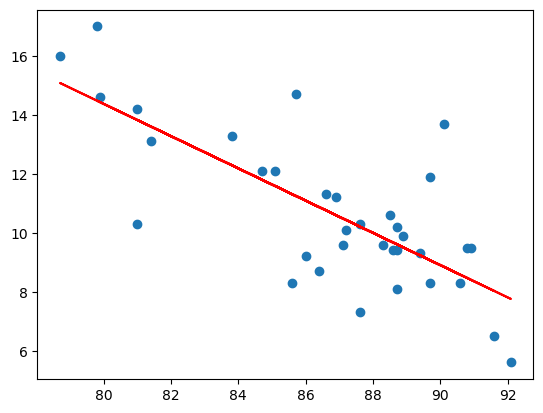

Уравнение линейной регрессии: Y = -0.5468494488646698 * X + 58.12001474232994
 Коэффициент детерминации: 0.5521017827492778


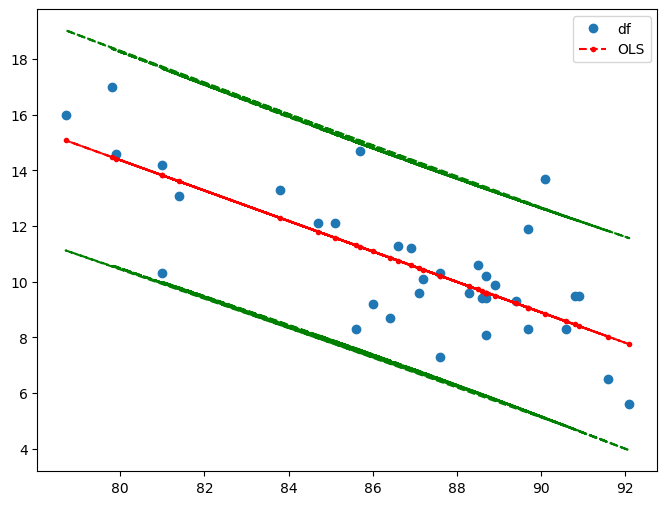

Уравнение линейной регрессии: Y = -0.5468494488646705 * X + 58.12001474233
 Коэффициент детерминации: -0.743035519170704


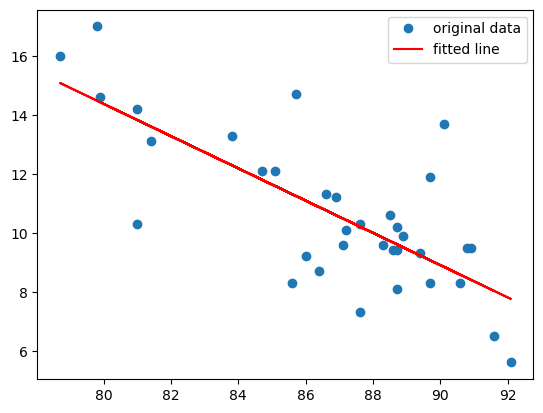

In [2]:
import pandas as pd
import numpy as np 
from numpy.random import seed
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
import scipy as sp
import scipy.stats as sst
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import linregress


df=pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
X = df[['hs_grad']] 
y = df['poverty']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# вариант 1 - linear Regression

lr=LinearRegression()
lr.fit(X_train,y_train)
print(f'Уравнение линейной регрессии: Y = {lr.coef_} * X + {lr.intercept_}')
y_pred = lr.predict(X_test)
print (f' Коэффициент детерминации: {lr.score(X_test, y_test)}') 
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train*lr.coef_ + lr.intercept_, c='r')
plt.show()

# вариант 2 - statmodels

X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
model = sm.OLS(y_train, X_const)
results = model.fit()
print(f'Уравнение линейной регрессии: Y = {results.params[1]} * X + {results.params[0]}')
print (f' Коэффициент детерминации: {results.rsquared}')
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(X_const.iloc[:, 1], y_train, 'o', label="df")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')
plt.show()

# вариант 3 - Scipy

slope, intercept, r_value, p_value, std_err = linregress(X_train['hs_grad'], y_train)
print(f'Уравнение линейной регрессии: Y = {slope} * X + {intercept}')
print (f' Коэффициент детерминации: {r_value}') 
plt.plot(X_train, y_train, 'o', label='original data')
plt.plot(X_train, intercept + slope*X_train, 'r', label='fitted line')
plt.legend()
plt.show()

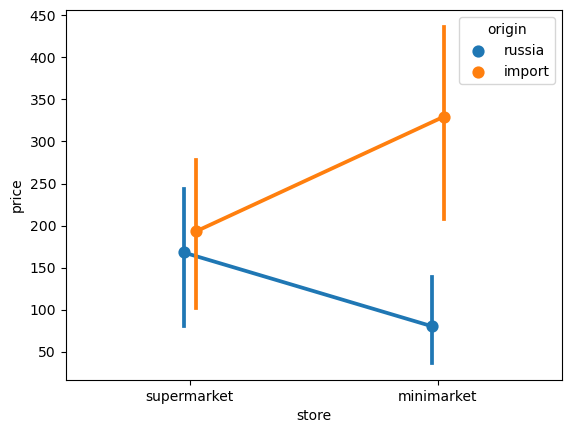

                df         sum_sq       mean_sq         F    PR(>F)
origin         1.0   94106.852405  94106.852405  7.967925  0.012252
store          1.0    2980.949445   2980.949445  0.252394  0.622238
origin:store   1.0   62777.133005  62777.133005  5.315272  0.034867
Residual      16.0  188971.368040  11810.710502       NaN       NaN


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat


df = pd.DataFrame(pd.read_csv('https://stepic.org/media/attachments/lesson/11505/shops.csv'))

sns.pointplot(data=df, x='store', y='price', hue='origin', dodge=True)
plt.show()

fit3 = stat()
fit3.anova_stat(df=df, res_var='price', anova_model='price ~ origin * store')
print(fit3.anova_summary)

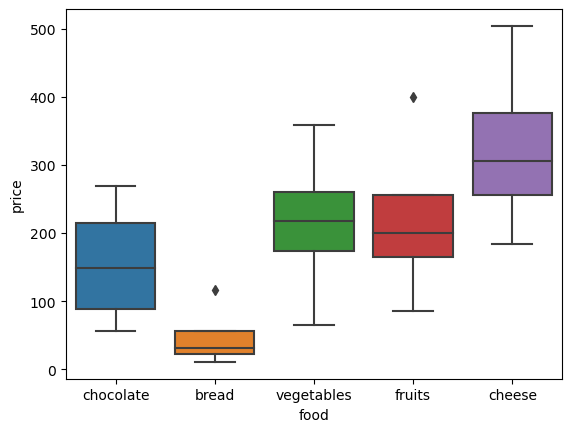

       group1      group2      Diff       Lower       Upper   q-value  \
6       bread      cheese  278.0525   36.840792  519.264208  5.034561   
5       bread      fruits  174.3125  -66.899208  415.524208  3.156191   
3   chocolate      cheese  169.8325  -71.379208  411.044208  3.075074   
4       bread  vegetables  167.7625  -73.449208  408.974208  3.037594   
8  vegetables      cheese  110.2900 -130.921708  351.501708  1.996967   
0   chocolate       bread  108.2200 -132.991708  349.431708  1.959487   
9      fruits      cheese  103.7400 -137.471708  344.951708  1.878369   
1   chocolate  vegetables   59.5425 -181.669208  300.754208  1.078107   
2   chocolate      fruits   66.0925 -175.119208  307.304208  1.196705   
7  vegetables      fruits    6.5500 -234.661708  247.761708  0.118598   

    p-value  
6  0.020423  
5  0.221042  
3  0.241371  
4  0.251331  
8  0.617181  
0  0.631232  
9  0.661647  
1  0.900000  
2  0.900000  
7  0.900000  


C:\Users\Евгений\AppData\Roaming\Python\Python310\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
C:\Users\Евгений\AppData\Roaming\Python\Python310\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
C:\Users\Евгений\AppData\Roaming\Python\Python310\site-packages\bioinfokit\analys.py:402: FutureWarning: The default value of numeric_only i

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat


df = pd.DataFrame(pd.read_csv('https://stepic.org/media/attachments/lesson/11505/shops.csv'))

sns.boxplot(data=df, x='food', y='price')
plt.show()

fit = stat()
fit.tukey_hsd(df=df, res_var='price', xfac_var='food', anova_model='price ~ food')
print(fit.tukey_summary.sort_values('p-value'))

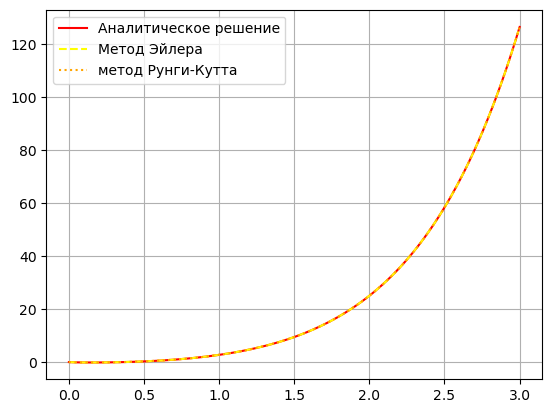

In [1]:
# Задание №575 y" = e^x / x + 2 * y' - y
import matplotlib.pyplot as plt
import numpy as np

# Аналитический метод
x0 = 0.001
x_end = 3
x = np.linspace(x0, x_end, 100)

y = np.exp(x)*(x * np.log(x) + x)


# метод Эйлера
dx = 0.01
xArr = []
yArr = []
x_new = x0
while x_new <= x_end:
    # equation
    y_new = np.exp(x_new)*(x_new * np.log(x_new) + x_new)
    xArr.append(x_new)
    yArr.append(y_new)
    x_new += dx




# метод Рунге-Кутта
def f10(fx,fy):
    return (np.log(fx)+2) * np.exp(fx) + (fx * np.log(fx) + fx) * np.exp(fx)


h = 0.001
i = 0
xRan = [x0]
yRan = [np.exp(x0)*(x0 * np.log(x0) + x0)]
while xRan[i] <= x_end:
    k1 = f10(xRan[i],yRan[i])
    k2 = f10(xRan[i]+h/2, yRan[i]+k1*h/2)
    k3 = f10(xRan[i]+h/2, yRan[i]+k2*h/2)
    k4 = f10(xRan[i]+h, yRan[i]+k3*h)
    xRan.append(xRan[i] + h)
    yRan.append(yRan[i] +  h*(k1 + 2*k2 + 2*k3 + k4) /6 )
    i += 1


plt.plot(x,y, color="red", linestyle = 'solid', label='Аналитическое решение')
plt.plot(xArr,yArr, color="yellow", linestyle = 'dashed', label='Метод Эйлера')
plt.plot(xRan,yRan, color="orange", linestyle = 'dotted', label='метод Рунги-Кутта')
plt.legend(loc='upper left')
plt.grid()
plt.show()


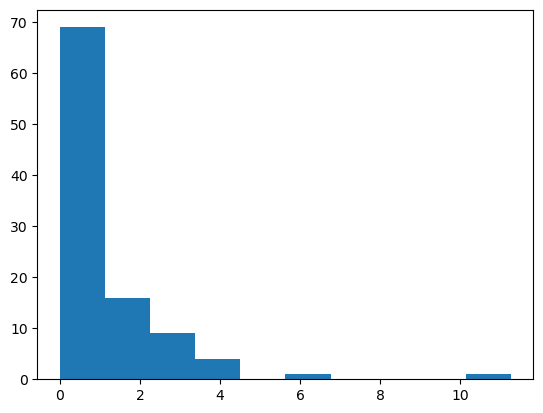

In [1]:
import random
import matplotlib.pyplot as plt

y = []
for i in range(100):

    x = []
    for i in range(60):
        x.append(random.randint(0, 1))

    y.append((x.count(0) - 30)**2 / 30 + (x.count(1) - 30)**2 / 30)
plt.hist(y)
plt.show()